In [54]:
# Importing Library
from datasets import load_dataset
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

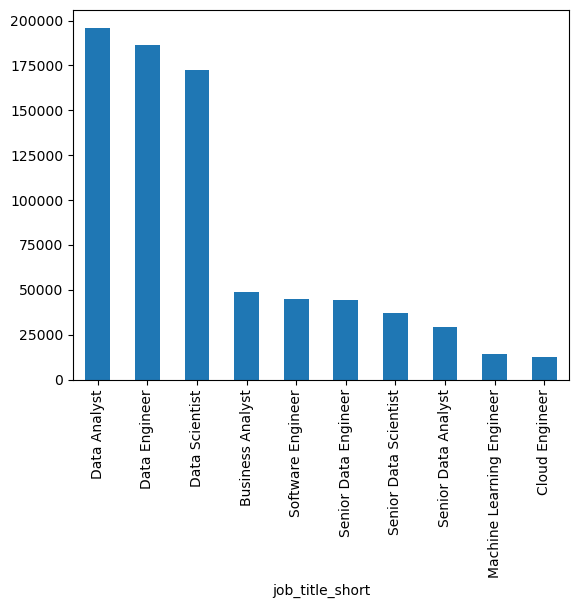

In [55]:
df['job_title_short'].value_counts().plot(kind='bar')

In [56]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

# Ploting through Pandas

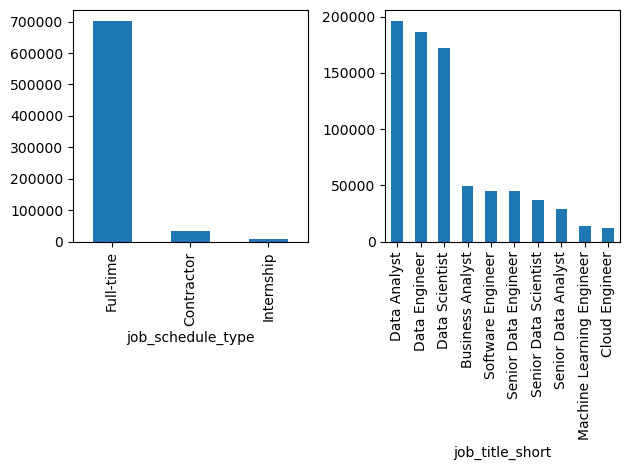

In [57]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

# Plotting through Matplotlib

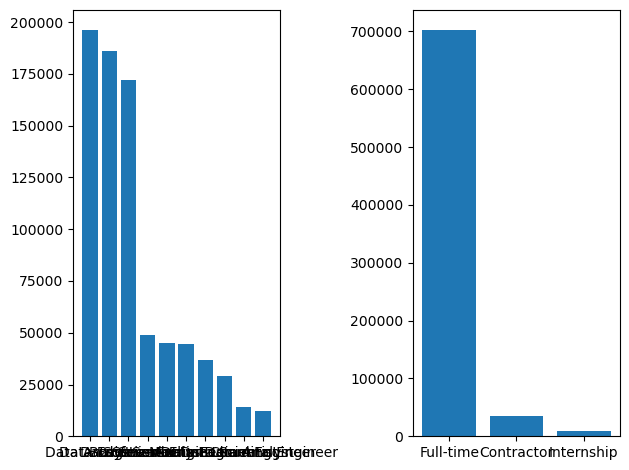

In [58]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

# Example - Counts of Top Skills in Job Posting

In [59]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skill_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [60]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

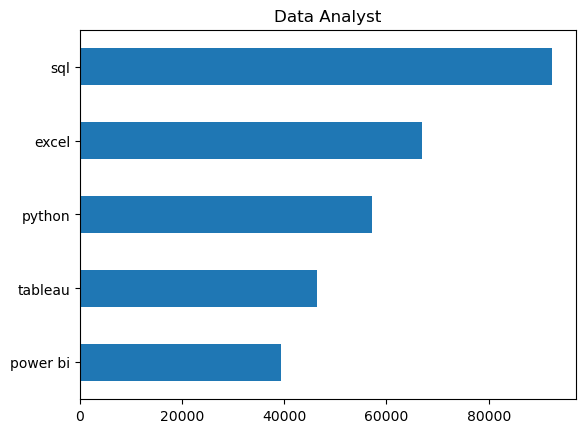

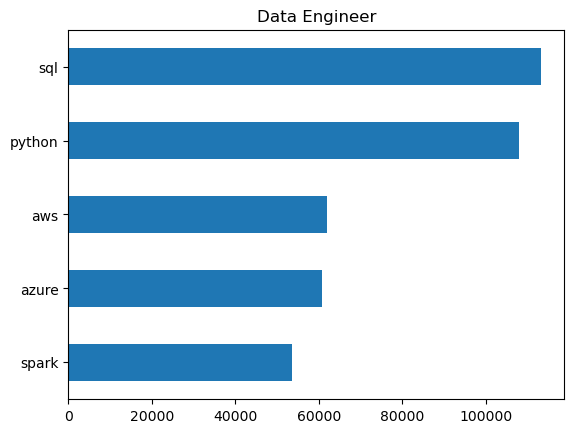

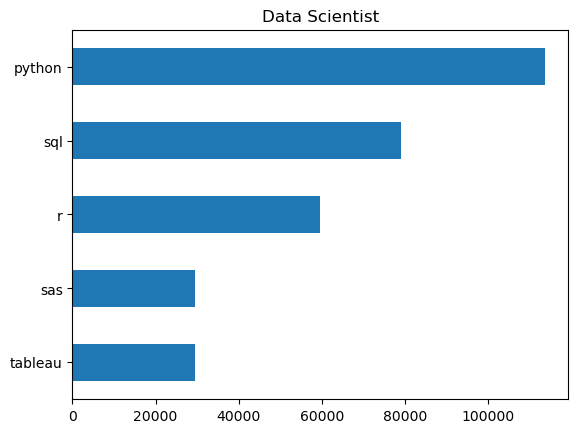

In [61]:
for i, job_title in enumerate(job_titles):
    df_skill_count[df_skill_count['job_title_short'] == job_title].head().plot(kind='barh', x='job_skills', y='skill_count', title=job_title)
    plt.gca().invert_yaxis()
    plt.gca().set_ylabel('')
    plt.gca().legend().set_visible(False)
    plt.show()

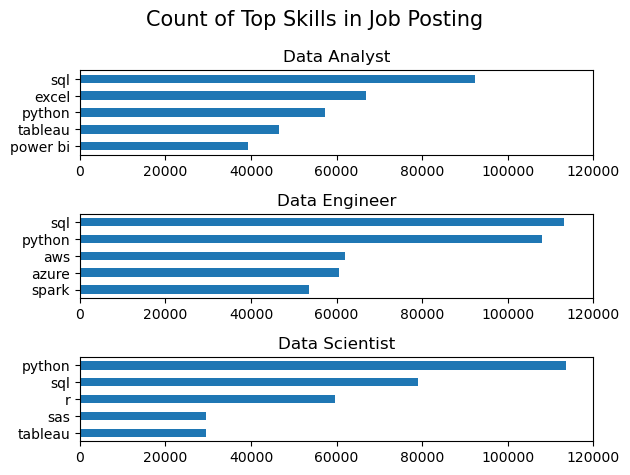

In [62]:
fig, ax =plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
   df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title= job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().set_visible(False)
   ax[i].set_xlim(0, 120000)

fig.suptitle('Count of Top Skills in Job Posting', fontsize=15)
fig.tight_layout()

# AI Generated Problems

Problem 1: Create Simple Subplots
- Load a dataset and create a DataFrame.
- Create a subplot with 1 row and 2 columns.
- Plot the counts of two different categorical variables in the subplots.
- Ensure the subplots do not overlap using tight_layout().

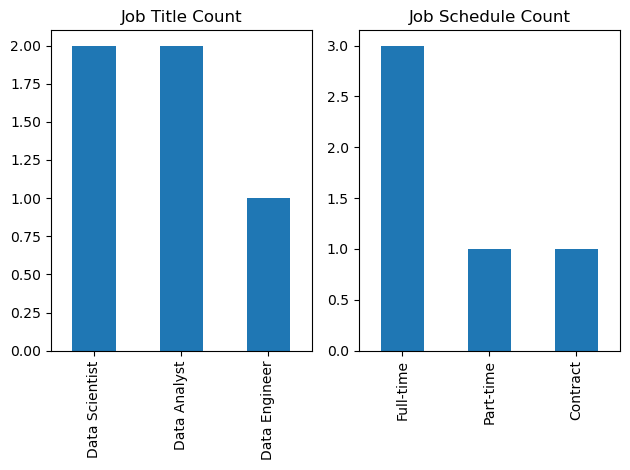

In [73]:
# # Sample DataFrame

data = {
    'job_title': ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Scientist', 'Data Analyst'],
    'job_schedule': ['Full-time', 'Part-time', 'Full-time', 'Contract', 'Full-time']
}
df = pd.DataFrame(data)

# Create subplots
fig, ax = plt.subplots(1, 2)

# Plot job title counts
df['job_title'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Job Title Count')
ax[0].set_xlabel('')

# Plot the Schedule Count
df['job_schedule'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Job Schedule Count')
ax[1].set_xlabel('')

fig.tight_layout()
plt.show()


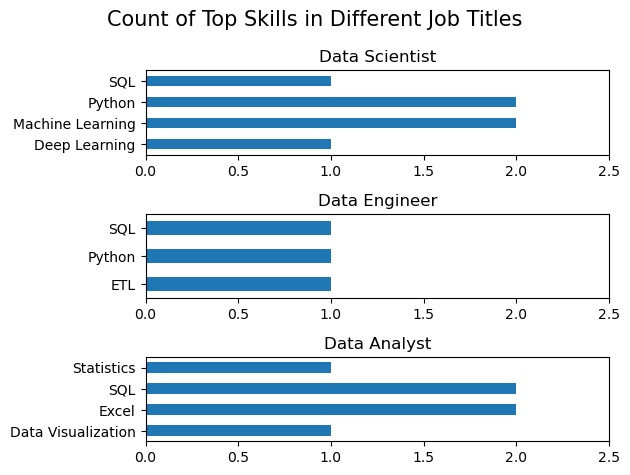

In [93]:
# Load a dataset and create a DataFrame.
# Extract the top 5 skills for each job title.
# Create a subplot for each job title displaying the top 5 skills in a horizontal bar chart.
# Use tight_layout() to ensure the subplots fit well within the figure.

# Sample DataFrame
data = {
    'job_title': ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Scientist', 'Data Analyst'],
    'job_skills': [['Python', 'SQL', 'Machine Learning'], ['SQL', 'Python', 'ETL'], ['Excel', 'SQL', 'Statistics'], ['Python', 'Machine Learning', 'Deep Learning'], ['Excel', 'SQL', 'Data Visualization']]
}
df = pd.DataFrame(data)

#Explode the Job Skills
df_explode = df.explode('job_skills')

# Count Skills of each job title
skill_count = df_explode.groupby(['job_title', 'job_skills']).size().reset_index(name='skill_count')

# Get the unique job titles
job_titles = df['job_title'].unique()

# Create the subplots
fig, ax = plt.subplots(len(job_titles), 1)

# Plot top 5 skills for each job title
for i, job_title in enumerate(job_titles):
    top_skills = skill_count[skill_count['job_title'] == job_title].head(5)
    top_skills.plot(kind='barh', x='job_skills', y='skill_count', title=job_title, ax=ax[i])
    ax[i].invert_xaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 2.5)
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Different Job Titles', fontsize=15)
fig.tight_layout()

plt.savefig('Top Skills of Different Job Title')
plt.show()


# Practise Problems

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

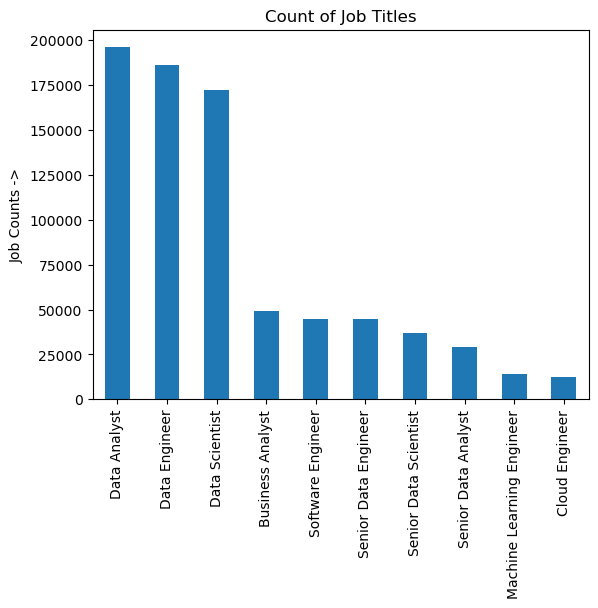

In [5]:
# Subplots with Bar Charts
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar')
plt.title("Count of Job Titles")
plt.xlabel('')
plt.ylabel('Job Counts ->')
plt.show()

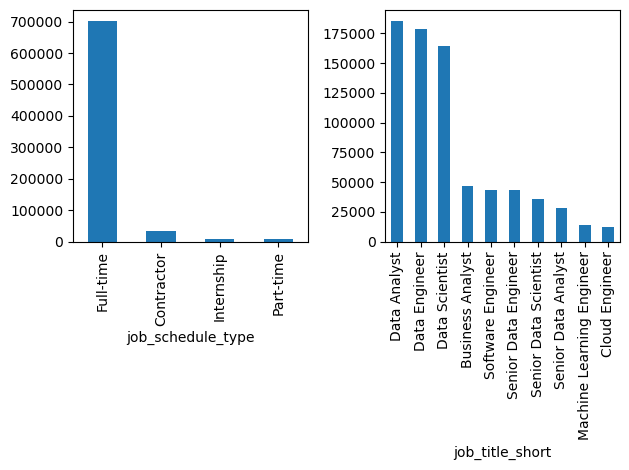

In [13]:
# Subplots with Job Titles by Schedule

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']
df_schedule_type = df[df['job_schedule_type'].isin(schedules)].copy()

df_schedule_type

fig, ax = plt.subplots(1, 2)

df_schedule_type['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df_schedule_type['job_schedule_type'].value_counts().head(4).plot(kind='bar', ax=ax[0])

fig.tight_layout()

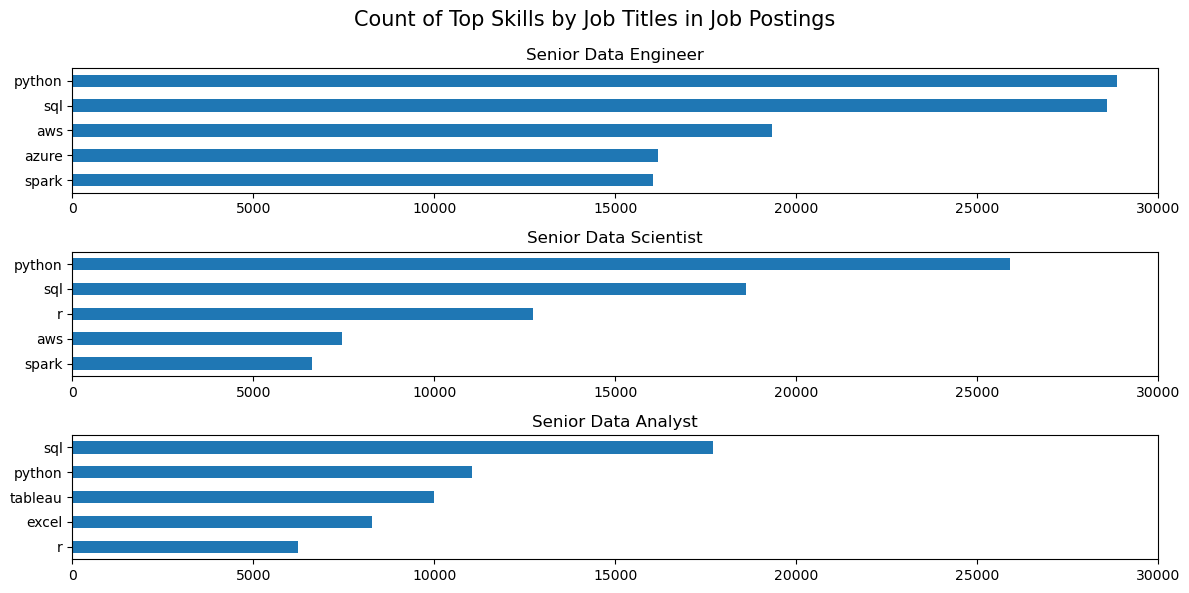

In [28]:
# Top Skills for Job Roles Subplots
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skill_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

job_roles = ['Senior Data Engineer', 'Senior Data Scientist', 'Senior Data Analyst']

fig, ax = plt.subplots(3, 1, figsize=(12, 6))

for i, job_role in enumerate(job_roles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_role].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', title=job_role, ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 30_000)
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Count of Top Skills by Job Titles in Job Postings", fontsize=15)   
fig.tight_layout()
    